<a href="https://colab.research.google.com/github/TejaswiGithu/Stock-Price--EDA_ARLO/blob/main/Stock_Price_EDA_ARLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math

from datetime import datetime

In [4]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [5]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

# download dataframe using pandas_datareader
stock_data = pdr.get_data_yahoo("ARLO", start="2017-12-17", end='2022-09-2',parse_dates=True,index_col='Date')

[*********************100%***********************]  1 of 1 completed


In [6]:
# stock_data = pd.read_csv('/content/drive/MyDrive/stock prices/FIGS.csv',parse_dates=True,index_col='Date')

In [7]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-03,18.500000,22.450001,18.299999,22.100000,22.100000,9347300
2018-08-06,21.820000,22.000000,20.120001,20.900000,20.900000,2479600
2018-08-07,20.700001,20.870001,19.799999,19.950001,19.950001,1493500
2018-08-08,19.850000,21.000000,19.809999,20.830000,20.830000,1914300
2018-08-09,20.799999,21.000000,19.000000,19.150000,19.150000,1959300
...,...,...,...,...,...,...
2022-08-26,6.690000,6.760000,6.450000,6.500000,6.500000,405400
2022-08-29,6.380000,6.500000,6.240000,6.250000,6.250000,524000
2022-08-30,6.280000,6.380000,6.160000,6.220000,6.220000,403500


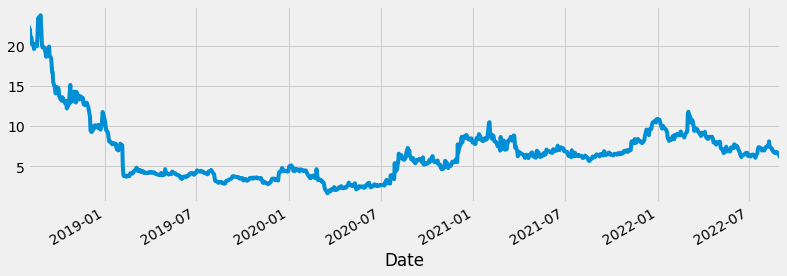

In [8]:
stock_data['High'].plot(xlim=['2018-08-03','2022-09-01'],figsize=(12,4))

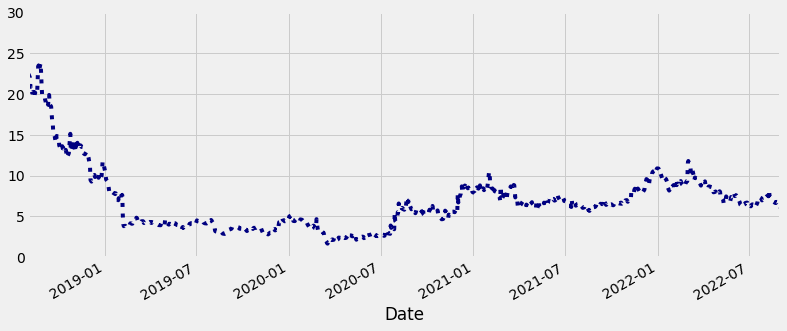

In [9]:
stock_data['High'].plot(xlim=['2018-08-03','2022-09-01'],ylim=[0,30],figsize=(12,5),ls='dotted',c='navy')

In [10]:
stock_vol=stock_data.loc['2018-08-03':'2022-09-01']['Volume']

In [11]:
stock_vol

Date
2018-08-03    9347300
2018-08-06    2479600
2018-08-07    1493500
2018-08-08    1914300
2018-08-09    1959300
               ...   
2022-08-26     405400
2022-08-29     524000
2022-08-30     403500
2022-08-31    1118900
2022-09-01     570700
Name: Volume, Length: 1028, dtype: int64

In [12]:
index=stock_data['2018-08-03':'2022-09-01'].index

In [13]:
index

DatetimeIndex(['2018-08-03', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10', '2018-08-13', '2018-08-14',
               '2018-08-15', '2018-08-16',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1028, freq=None)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

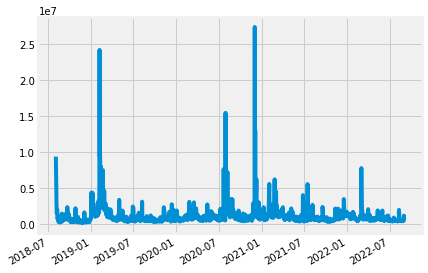

In [15]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,stock_vol)

In [16]:
df_arlo=stock_data.reset_index()

In [17]:
df_arlo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1028 non-null   datetime64[ns]
 1   Open       1028 non-null   float64       
 2   High       1028 non-null   float64       
 3   Low        1028 non-null   float64       
 4   Close      1028 non-null   float64       
 5   Adj Close  1028 non-null   float64       
 6   Volume     1028 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 56.3 KB


In [18]:
#pd.to_datetime(df_arlo['Date'])

In [19]:
df_arlo

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-03,18.500000,22.450001,18.299999,22.100000,22.100000,9347300
1,2018-08-06,21.820000,22.000000,20.120001,20.900000,20.900000,2479600
2,2018-08-07,20.700001,20.870001,19.799999,19.950001,19.950001,1493500
3,2018-08-08,19.850000,21.000000,19.809999,20.830000,20.830000,1914300
4,2018-08-09,20.799999,21.000000,19.000000,19.150000,19.150000,1959300
...,...,...,...,...,...,...,...
1023,2022-08-26,6.690000,6.760000,6.450000,6.500000,6.500000,405400
1024,2022-08-29,6.380000,6.500000,6.240000,6.250000,6.250000,524000
1025,2022-08-30,6.280000,6.380000,6.160000,6.220000,6.220000,403500
1026,2022-08-31,6.250000,6.270000,6.030000,6.090000,6.090000,1118900


In [20]:
df_arlo = df_arlo.set_index('Date',drop=True)

In [21]:
df_arlo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-03,18.500000,22.450001,18.299999,22.100000,22.100000,9347300
2018-08-06,21.820000,22.000000,20.120001,20.900000,20.900000,2479600
2018-08-07,20.700001,20.870001,19.799999,19.950001,19.950001,1493500
2018-08-08,19.850000,21.000000,19.809999,20.830000,20.830000,1914300
2018-08-09,20.799999,21.000000,19.000000,19.150000,19.150000,1959300
...,...,...,...,...,...,...
2022-08-26,6.690000,6.760000,6.450000,6.500000,6.500000,405400
2022-08-29,6.380000,6.500000,6.240000,6.250000,6.250000,524000
2022-08-30,6.280000,6.380000,6.160000,6.220000,6.220000,403500


In [22]:
from datetime import datetime

In [23]:
datetime.now()

datetime.datetime(2022, 9, 2, 22, 15, 17, 974389)

In [24]:
df_arlo

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-03,18.500000,22.450001,18.299999,22.100000,22.100000,9347300
2018-08-06,21.820000,22.000000,20.120001,20.900000,20.900000,2479600
2018-08-07,20.700001,20.870001,19.799999,19.950001,19.950001,1493500
2018-08-08,19.850000,21.000000,19.809999,20.830000,20.830000,1914300
2018-08-09,20.799999,21.000000,19.000000,19.150000,19.150000,1959300
...,...,...,...,...,...,...
2022-08-26,6.690000,6.760000,6.450000,6.500000,6.500000,405400
2022-08-29,6.380000,6.500000,6.240000,6.250000,6.250000,524000
2022-08-30,6.280000,6.380000,6.160000,6.220000,6.220000,403500


In [26]:
df_arlo.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,8.97,9.26,8.76,8.80,8.80,98300
2019-12-31,2.73,2.79,2.66,2.68,2.68,219000
2020-12-31,1.50,1.66,1.20,1.50,1.50,304100
2021-12-31,5.53,5.67,5.48,5.56,5.56,246500
2022-12-31,6.00,6.05,5.80,5.94,5.94,309000


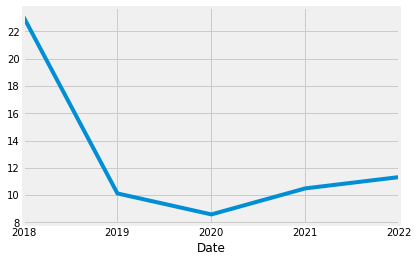

In [30]:
df_arlo.resample(rule='A').max()['Close'].plot()

In [31]:
df_arlo.resample(rule='QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-01,22.99,23.77,22.60,23.08,23.08,9347300
2018-10-01,14.50,15.12,14.30,14.52,14.52,2152000
2019-01-01,9.96,10.50,9.47,10.12,10.12,24199400
2019-04-01,4.41,4.66,4.15,4.26,4.26,3322400
2019-07-01,4.42,4.56,4.35,4.48,4.48,3072700
2019-10-01,4.67,4.80,4.44,4.65,4.65,2707900
2020-01-01,4.91,5.13,4.75,4.97,4.97,3039600
2020-04-01,2.95,2.99,2.69,2.93,2.93,2686800
2020-07-01,6.91,7.30,6.53,6.82,6.82,15439000


In [41]:
df_arlo['Close'].rolling(12).max().head(20)

Date
2018-08-03      NaN
2018-08-06      NaN
2018-08-07      NaN
2018-08-08      NaN
2018-08-09      NaN
2018-08-10      NaN
2018-08-13      NaN
2018-08-14      NaN
2018-08-15      NaN
2018-08-16      NaN
2018-08-17      NaN
2018-08-20    22.10
2018-08-21    20.90
2018-08-22    21.48
2018-08-23    22.73
2018-08-24    22.73
2018-08-27    23.08
2018-08-28    23.08
2018-08-29    23.08
2018-08-30    23.08
Name: Close, dtype: float64